In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime

In [107]:
network = "VG"
station = "PSAG"
location = "00"
channel = "EHZ"

nslc = "{}.{}.{}.{}".format(network, station, location, channel)

In [108]:
bands: dict[str, list[float]] = {
    'HF' : [0.1, 8.0, 16.0],
    'LF' : [0.1, 4.5, 8.0],
}

In [109]:
current_dir: str = os.getcwd()
input_directory: str = os.path.join(current_dir, "output")
output_directory: str = os.path.join(current_dir, "output", "dsar")
os.makedirs(output_directory, exist_ok=True)

figures_directory: str = os.path.join(input_directory, "figures")
os.makedirs(figures_directory, exist_ok=True)

combined_HF_csv: str = os.path.join(
    input_directory, "HF", 'combined_{}Hz_{}.csv'.format('-'.join(map(str,bands['HF'])), nslc))
combined_LF_csv: str = os.path.join(
    input_directory, "LF", 'combined_{}Hz_{}.csv'.format('-'.join(map(str,bands['LF'])), nslc))

In [110]:
# start date, end date of eruption
continous_eruptions: list[list[str]] = [
    ['2017-11-21', '2017-11-29'],
    ['2018-06-27', '2018-07-16'],
    ['2018-07-24', '2018-07-27'],
]

# Single eruption
single_eruptions: list[str] = [
    '2017-11-25',
    '2017-11-26',
    '2017-11-27',
    '2017-11-29',
    '2017-12-08',
    '2017-12-09',
    '2017-12-10',
    '2017-12-11',
    '2017-12-12',
    '2017-12-23',
    '2017-12-24',
    '2017-12-26',
    '2017-12-28',
    '2018-01-01',
    '2018-01-03',
    '2018-01-11',
    '2018-01-15',
    '2018-01-17',
    '2018-01-18',
    '2018-01-19',
    '2018-01-20',
    '2018-01-22',
    '2018-01-23',
    '2018-01-24',
    '2018-02-13',
    '2018-03-11',
    '2018-03-26',
    '2018-04-06',
    '2018-04-15',
    '2018-04-30',
    '2018-05-19',
    '2018-05-29',
    '2018-06-10',
    '2018-06-13',
    '2018-06-15',
    '2018-06-27',
    '2018-07-02',
    '2018-07-03',
    '2018-07-04',
    '2018-07-05',
    '2018-07-06',
    '2018-07-08',
    '2018-07-09',
    '2018-07-11',
    '2018-07-13',
    '2018-07-15',
    '2018-07-16',
    '2018-07-21',
    '2018-07-24',
    '2018-07-25',
    '2018-07-27']

In [111]:
HF = pd.read_csv(combined_HF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)
LF = pd.read_csv(combined_LF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)


In [112]:
HF

,values
datetime,
2017-10-18 00:00:00,1.241673e-14
2017-10-18 00:10:00,1.421229e+00
2017-10-18 00:20:00,3.045643e+00
2017-10-18 00:30:00,1.613389e+00
2017-10-18 00:40:00,1.583046e+00
...,...
2018-07-31 23:20:00,1.080392e+00
2018-07-31 23:30:00,1.214988e+00
2018-07-31 23:40:00,1.536880e+00


In [113]:
LF

,values
datetime,
2017-10-18 00:00:00,1.362333e-13
2017-10-18 00:10:00,3.144161e+00
2017-10-18 00:20:00,8.935860e+00
2017-10-18 00:30:00,3.920215e+00
2017-10-18 00:40:00,3.738284e+00
...,...
2018-07-31 23:20:00,3.452702e+00
2018-07-31 23:30:00,4.006712e+00
2018-07-31 23:40:00,5.038084e+00


In [114]:
df = pd.DataFrame()

In [132]:
df['LF'] = LF['values'].sort_index()
df['HF'] = HF['values'].sort_index()
df['DSAR'] = (df['LF']/df['HF'])
df['DSAR_24h'] = df['DSAR'].rolling('24h', center=True).median()
df['DSAR_6h'] = df['DSAR'].rolling('6h').median()

In [133]:
df

,LF,HF,DSAR,DSAR_24h,DSAR_6h
datetime,,,,,
2017-10-18 00:00:00,1.362333e-13,1.241673e-14,10.971757,2.208376,10.971757
2017-10-18 00:10:00,3.144161e+00,1.421229e+00,2.212283,2.200077,6.592020
2017-10-18 00:20:00,8.935860e+00,3.045643e+00,2.933982,2.191778,2.933982
2017-10-18 00:30:00,3.920215e+00,1.613389e+00,2.429801,2.188354,2.681891
2017-10-18 00:40:00,3.738284e+00,1.583046e+00,2.361450,2.184931,2.429801
...,...,...,...,...,...
2018-07-31 23:20:00,3.452702e+00,1.080392e+00,3.195787,2.554840,2.809362
2018-07-31 23:30:00,4.006712e+00,1.214988e+00,3.297737,2.546768,2.823060
2018-07-31 23:40:00,5.038084e+00,1.536880e+00,3.278123,2.554840,2.836211


In [134]:
df = df.dropna()

In [135]:
df.loc[~df.index.duplicated(), :]

,LF,HF,DSAR,DSAR_24h,DSAR_6h
datetime,,,,,
2017-10-18 00:00:00,1.362333e-13,1.241673e-14,10.971757,2.208376,10.971757
2017-10-18 00:10:00,3.144161e+00,1.421229e+00,2.212283,2.200077,6.592020
2017-10-18 00:20:00,8.935860e+00,3.045643e+00,2.933982,2.191778,2.933982
2017-10-18 00:30:00,3.920215e+00,1.613389e+00,2.429801,2.188354,2.681891
2017-10-18 00:40:00,3.738284e+00,1.583046e+00,2.361450,2.184931,2.429801
...,...,...,...,...,...
2018-07-31 23:20:00,3.452702e+00,1.080392e+00,3.195787,2.554840,2.809362
2018-07-31 23:30:00,4.006712e+00,1.214988e+00,3.297737,2.546768,2.823060
2018-07-31 23:40:00,5.038084e+00,1.536880e+00,3.278123,2.554840,2.836211


In [136]:
df = df.interpolate('time').interpolate()

In [137]:
df

,LF,HF,DSAR,DSAR_24h,DSAR_6h
datetime,,,,,
2017-10-18 00:00:00,1.362333e-13,1.241673e-14,10.971757,2.208376,10.971757
2017-10-18 00:10:00,3.144161e+00,1.421229e+00,2.212283,2.200077,6.592020
2017-10-18 00:20:00,8.935860e+00,3.045643e+00,2.933982,2.191778,2.933982
2017-10-18 00:30:00,3.920215e+00,1.613389e+00,2.429801,2.188354,2.681891
2017-10-18 00:40:00,3.738284e+00,1.583046e+00,2.361450,2.184931,2.429801
...,...,...,...,...,...
2018-07-31 23:20:00,3.452702e+00,1.080392e+00,3.195787,2.554840,2.809362
2018-07-31 23:30:00,4.006712e+00,1.214988e+00,3.297737,2.546768,2.823060
2018-07-31 23:40:00,5.038084e+00,1.536880e+00,3.278123,2.554840,2.836211


In [138]:
filename = os.path.join(output_directory, "DSAR_{}.csv".format(nslc))
df.to_csv(filename)

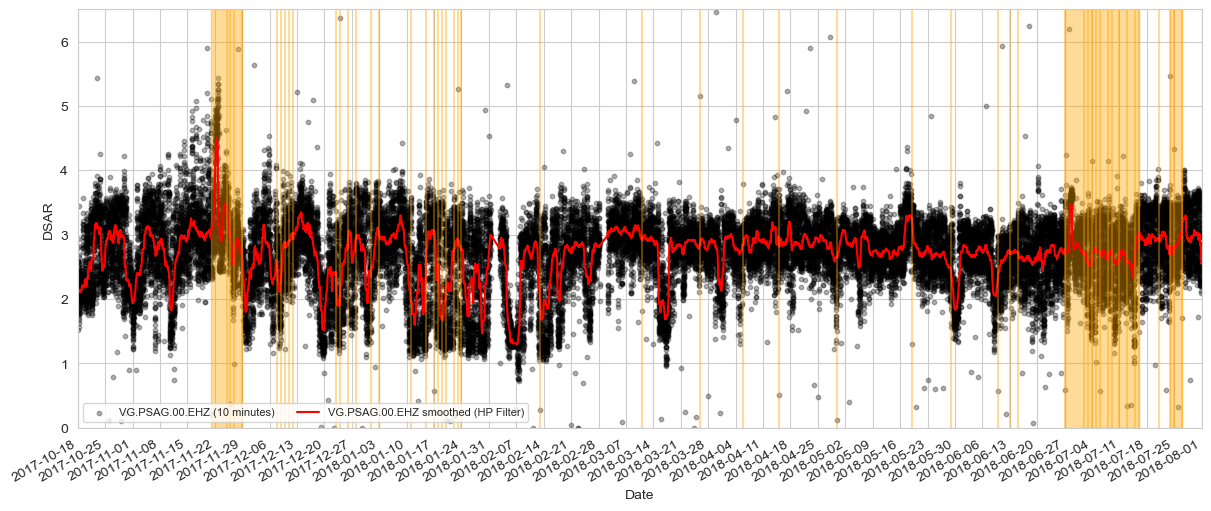

In [142]:
import matplotlib.dates as mdates

# HP filter documentation https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
cycle,trend = hpfilter(df.DSAR, 1000000)

fig, axs = plt.subplots(figsize=(12, 5), layout="constrained")

# Plotting DSAR values
scatter = axs.scatter(df.index, df.DSAR, c= 'k', alpha=0.3, s=10, label='{} (10 minutes)'.format(nslc))

# Plotting smoothed DSAR values
smoothed_using_HP_filter = axs.plot(df.index, df.DSAR_24h, c='red', label='{} smoothed (HP Filter)'.format(nslc), alpha=1)

# Add legend    
axs.legend(loc='lower left', fontsize='8', ncol=4)
axs.set_ylabel('DSAR')
axs.set_xlabel('Date')
axs.xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# You can change this values
axs.set_ylim(0,6.5)
axs.set_xlim(df.first_valid_index(), df.last_valid_index())


for continous in continous_eruptions:
    axs.axvspan(continous[0], continous[1], alpha=0.4, color='orange')

for date in single_eruptions:
    axs.axvline(datetime.strptime(date, '%Y-%m-%d'), alpha=0.4, color='orange')

for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

In [143]:
filename = 'DSAR_{}_{}-{}.png'.format(nslc, df.first_valid_index(), df.last_valid_index())
fig.savefig(os.path.join(figures_directory, '{}.png'.format(nslc)))
print("✅ Saved figure {}".format(os.path.join(figures_directory, filename)))

✅ Saved figure D:\Projects\dsar\output\figures\VG.PSAG.00.EHZ.png
